# Imports

In [1]:
import requests

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

# Descargar imagen desde un url

In [2]:
def download_file(url, name):
    img_data = requests.get(url).content
    with open(name, 'wb') as handler:
        handler.write(img_data)

In [3]:
download_file("https://drive.google.com/uc?id=172YQImbMxL5_170BhDvJkEBnzhOnZoSF", "Hello_Kitty.jpg")
download_file("https://drive.google.com/uc?id=1Njfd-1oxYBr3CRwwOAKkoqM_kXpPBEyO", "Parrot.jpg")

# Tratamiento de imágenes con matplotlib

La función *imread([ruta_imagen])* carga una imágen en un objeto **numpy**.

A través de la función *imshow([numpy_array])* se muestra una imagen por **pantalla**. Sin embargo no es hasta que se invoca el comando *show()* cuando la imagen se muestra.

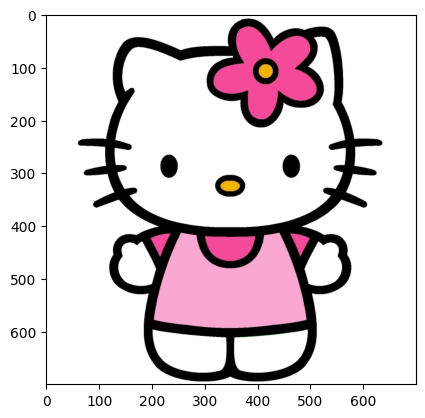

In [4]:
img_loaded = plt.imread("/content/Hello_Kitty.jpg")
plt.imshow(img_loaded)
plt.show()

In [5]:
img_loaded

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [6]:
print("Tipo de objeto de imagen: ", type(img_loaded))
print("Dimensiones de la imagen: ", np.shape(img_loaded))
print("Valor máximo: ", img_loaded.max())
print("Valor mínimo: ", img_loaded[:,:,0].min())

Tipo de objeto de imagen:  <class 'numpy.ndarray'>
Dimensiones de la imagen:  (700, 700, 3)
Valor máximo:  255
Valor mínimo:  0


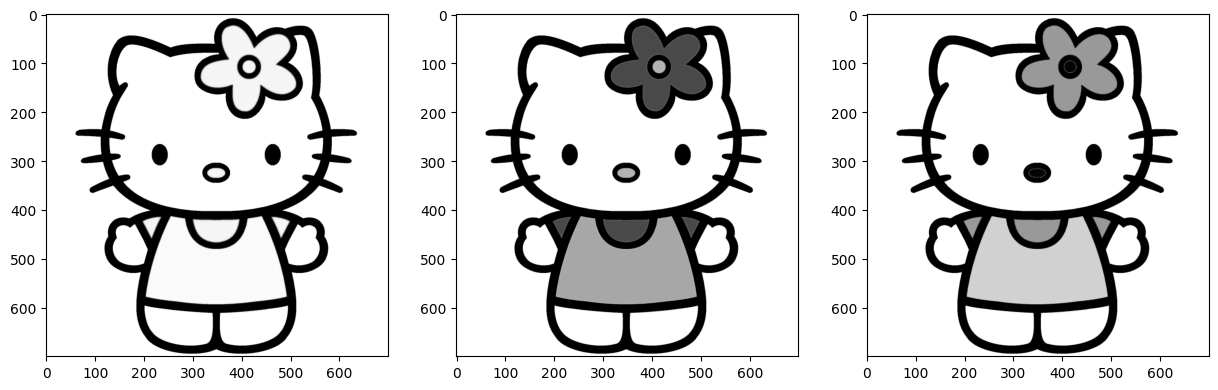

In [7]:
fig, ax = plt.subplots(1, 3, figsize=[15,5])

ax[0].imshow(img_loaded[:,:,0], cmap='gray')
ax[1].imshow(img_loaded[:,:,1], cmap='gray')
ax[2].imshow(img_loaded[:,:,2], cmap='gray')

plt.show()

# Normalizar valor de los píxeles

In [8]:
print("Valor máximo antes de la normalización: ", img_loaded[:,:,0].max())
print("Valor mínimo antes de la normalización: ", img_loaded[:,:,0].min())

Valor máximo antes de la normalización:  255
Valor mínimo antes de la normalización:  0


In [9]:
img_loaded = img_loaded/255

In [10]:
print("Valor máximo después de la normalización: ", img_loaded[:,:,0].max())
print("Valor mínimo después de la normalización: ", img_loaded[:,:,0].min())

Valor máximo después de la normalización:  1.0
Valor mínimo después de la normalización:  0.0


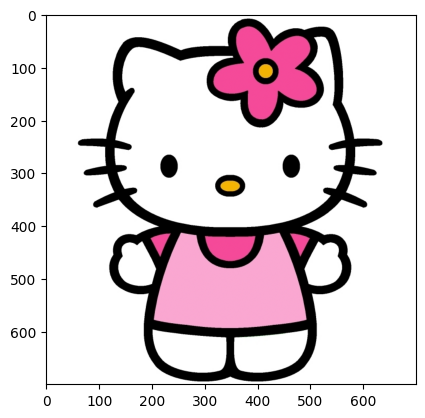

In [13]:
plt.imshow(img_loaded)
plt.show()

# Tratamiento de imágenes con PIL

La librería PIL tiene una serie de ventajas respecto a tratar las imágenes como arrays directamente

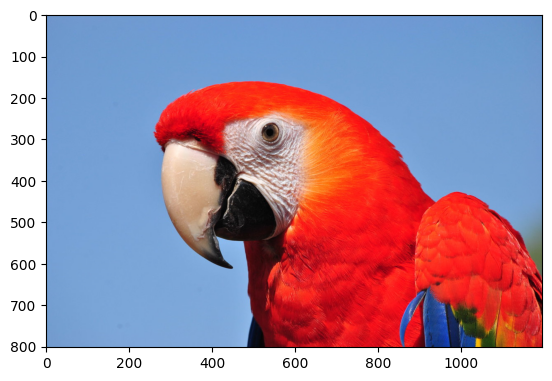

In [14]:
img = Image.open("Parrot.jpg")
plt.imshow(img)
plt.show()

Sin embargo, si observamos el tipo de objeto que es **img**, podemos ver que es de tipo **objeto imagen** de PIL, y no un array.

In [16]:
type(img)

PIL.PngImagePlugin.PngImageFile

Una vez cargada la imagen, podemos observar su tamaño aaccediendo a sus parámetros size.

In [17]:
print(img.size)

(1197, 802)


# Operaciones básicas de transformación

La principal ventaja de PIL es que puede transformar de manera sencilla las imágenes, cambiando su tamaño, orientación, códificación, etc.

## Cambiar tamaño de imagen (reshape)

In [18]:
print("Dimensiones de la imagen antes del reshape: ", np.shape(img))

Dimensiones de la imagen antes del reshape:  (802, 1197, 3)


In [25]:
img_resized = img.resize((64,64))

Dimensiones de la imagen después del reshape:  (64, 64)


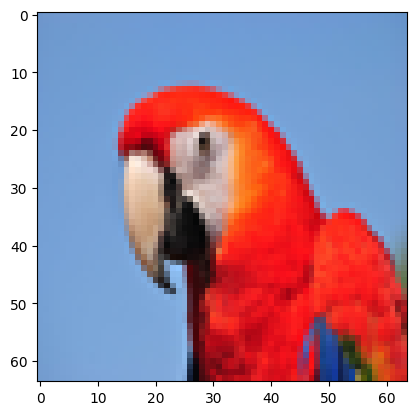

In [26]:
print("Dimensiones de la imagen después del reshape: ", img_resized.size)
plt.imshow(img_resized)
plt.show()

## Rotar imagen (rotate)

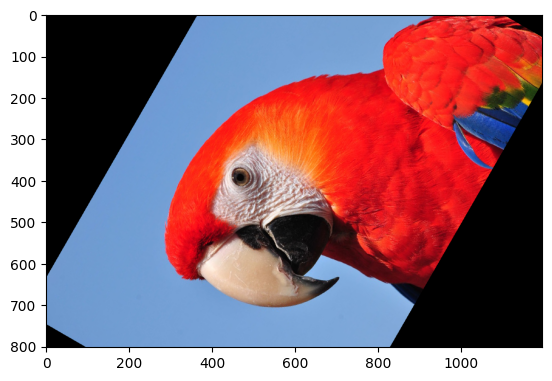

In [27]:
img_rotated = img.rotate(60)
plt.imshow(img_rotated)
plt.show()

## Paso a blanco y negro

Existen dos alternativas para utilizar imágenes en blanco y negro desde una imagen a color

Para pasar de una imagen a color a una en blanco y negro usamos el método grayscale() del módulo ImageOps

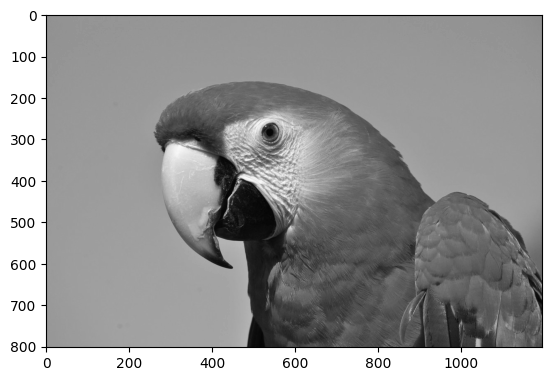

In [28]:
img_bw = ImageOps.grayscale(img)
plt.imshow(img_bw, cmap='gray')
plt.show()

La otra alternativa es convertir la imagen con el método convert, la opción *('L')* indica que sólo se codificará la intensidad de luz de cada pixel.

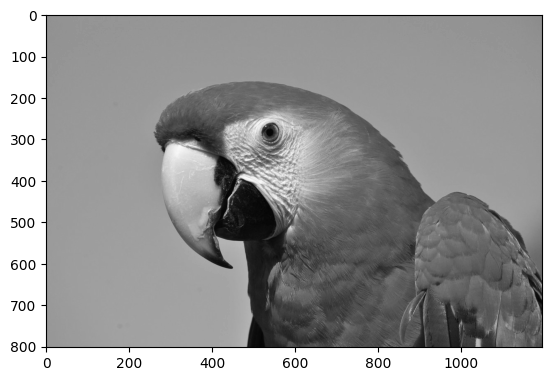

In [29]:
img_bw = img.convert('L')
plt.imshow(img_bw, cmap='gray')
plt.show()

---

Creado por **Guillermo Iglesias** (guillermo.iglesias@u-tad.com)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">